In [176]:
import numpy as np
import pyfits
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from tqdm import tqdm

plt.rcParams["figure.figsize"]=20,20
%matplotlib inline

def func(x, *params):  # x0 pk width
    y = np.zeros_like(x)
    for i in range(0, len(params)-1, 3):
        ctr = params[i]
        amp = params[i+1]
        wid = params[i+2]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
    return y+params[-1] 

In [120]:
hdulist = pyfits.open("arc.fits")

arcimg = np.rot90(hdulist[0].data, -1)
arcimg = arcimg * 1.0 / np.max(arcimg, axis=1)[:, None]


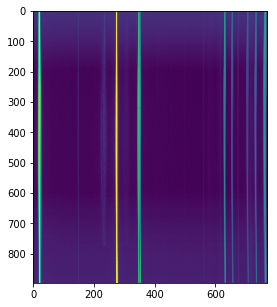

In [122]:
plt.figure(figsize=(5,5))
imgplot = plt.imshow(np.log10(arcimg))

In [96]:
# plt.figure(figsize=(10,10))
# plt.plot(arcimg[0,:])

In [222]:
fits = np.zeros((arcimg.shape[0], 28))

spec = arcimg[0, :]
peaks, properties = find_peaks(spec, height=0.01, width=1.5, prominence=0.01)

y0 = np.zeros((peaks.size * 3))
y0[0::3] = peaks
y0[1::3] = properties["peak_heights"]
y0[2::3] = properties["widths"] * 0.5
y0 = np.append(y0, 0.02)

fits[0,:], pcov = curve_fit(func, x, spec, p0=y0)

for row in tqdm(range(1, arcimg.shape[0])):
    spec = arcimg[row, :]
    y0 = fits[row-1,:]
    fits[row,:], pcov = curve_fit(func, x, spec, p0=y0)

100%|██████████| 895/895 [02:18<00:00,  6.44it/s]


9


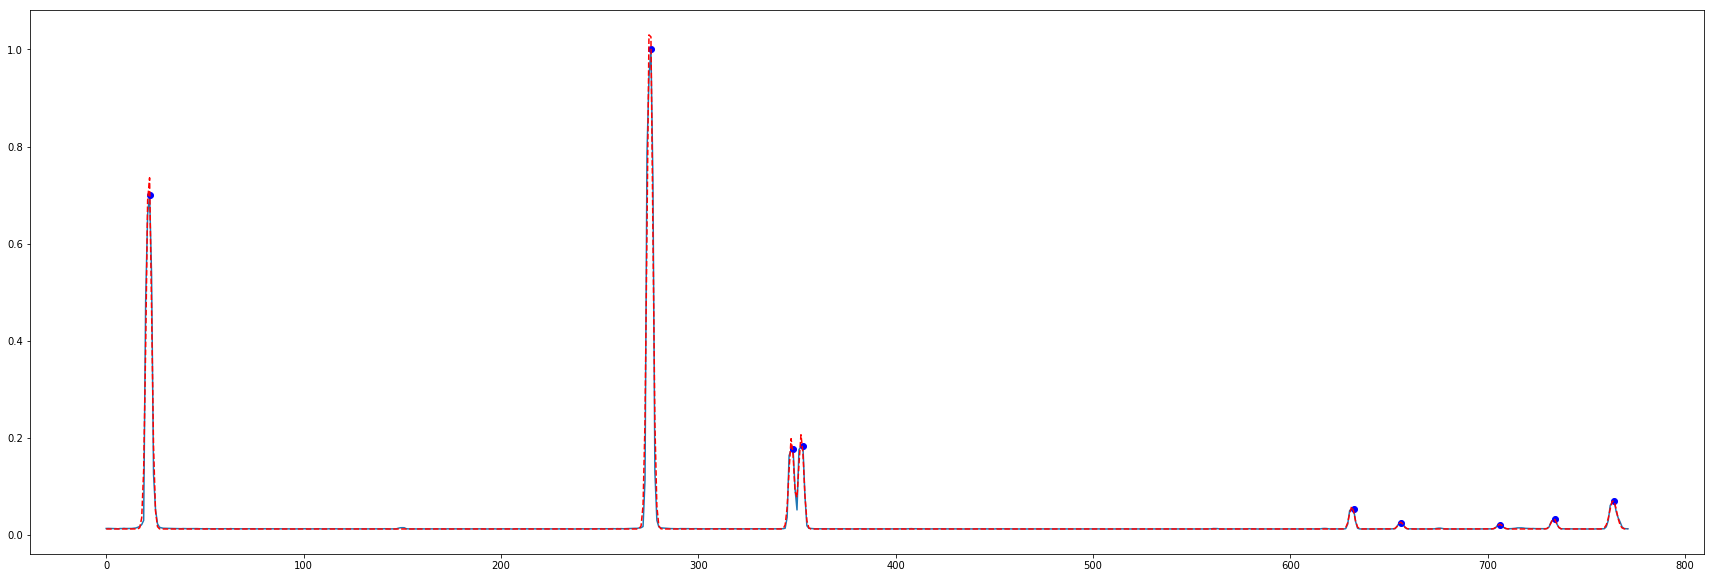

In [219]:
spec = arcimg[894, :]
peaks, properties = find_peaks(spec, height=0.01, width=1.5, prominence=0.005)
y0 = np.zeros((peaks.size * 3))
y0[0::3] = peaks
y0[1::3] = properties["peak_heights"]
y0[2::3] = properties["widths"] * 0.5
y0 = np.append(y0, 0.02)
popt, pcov = curve_fit(func, x, spec, p0=y0)
fit = func(x, *popt)
print(len(peaks))

plt.figure(figsize=(30,10))
plt.plot(x,spec)
plt.plot(x[peaks], spec[peaks], "bo")
plt.plot(x, fit , 'r--')

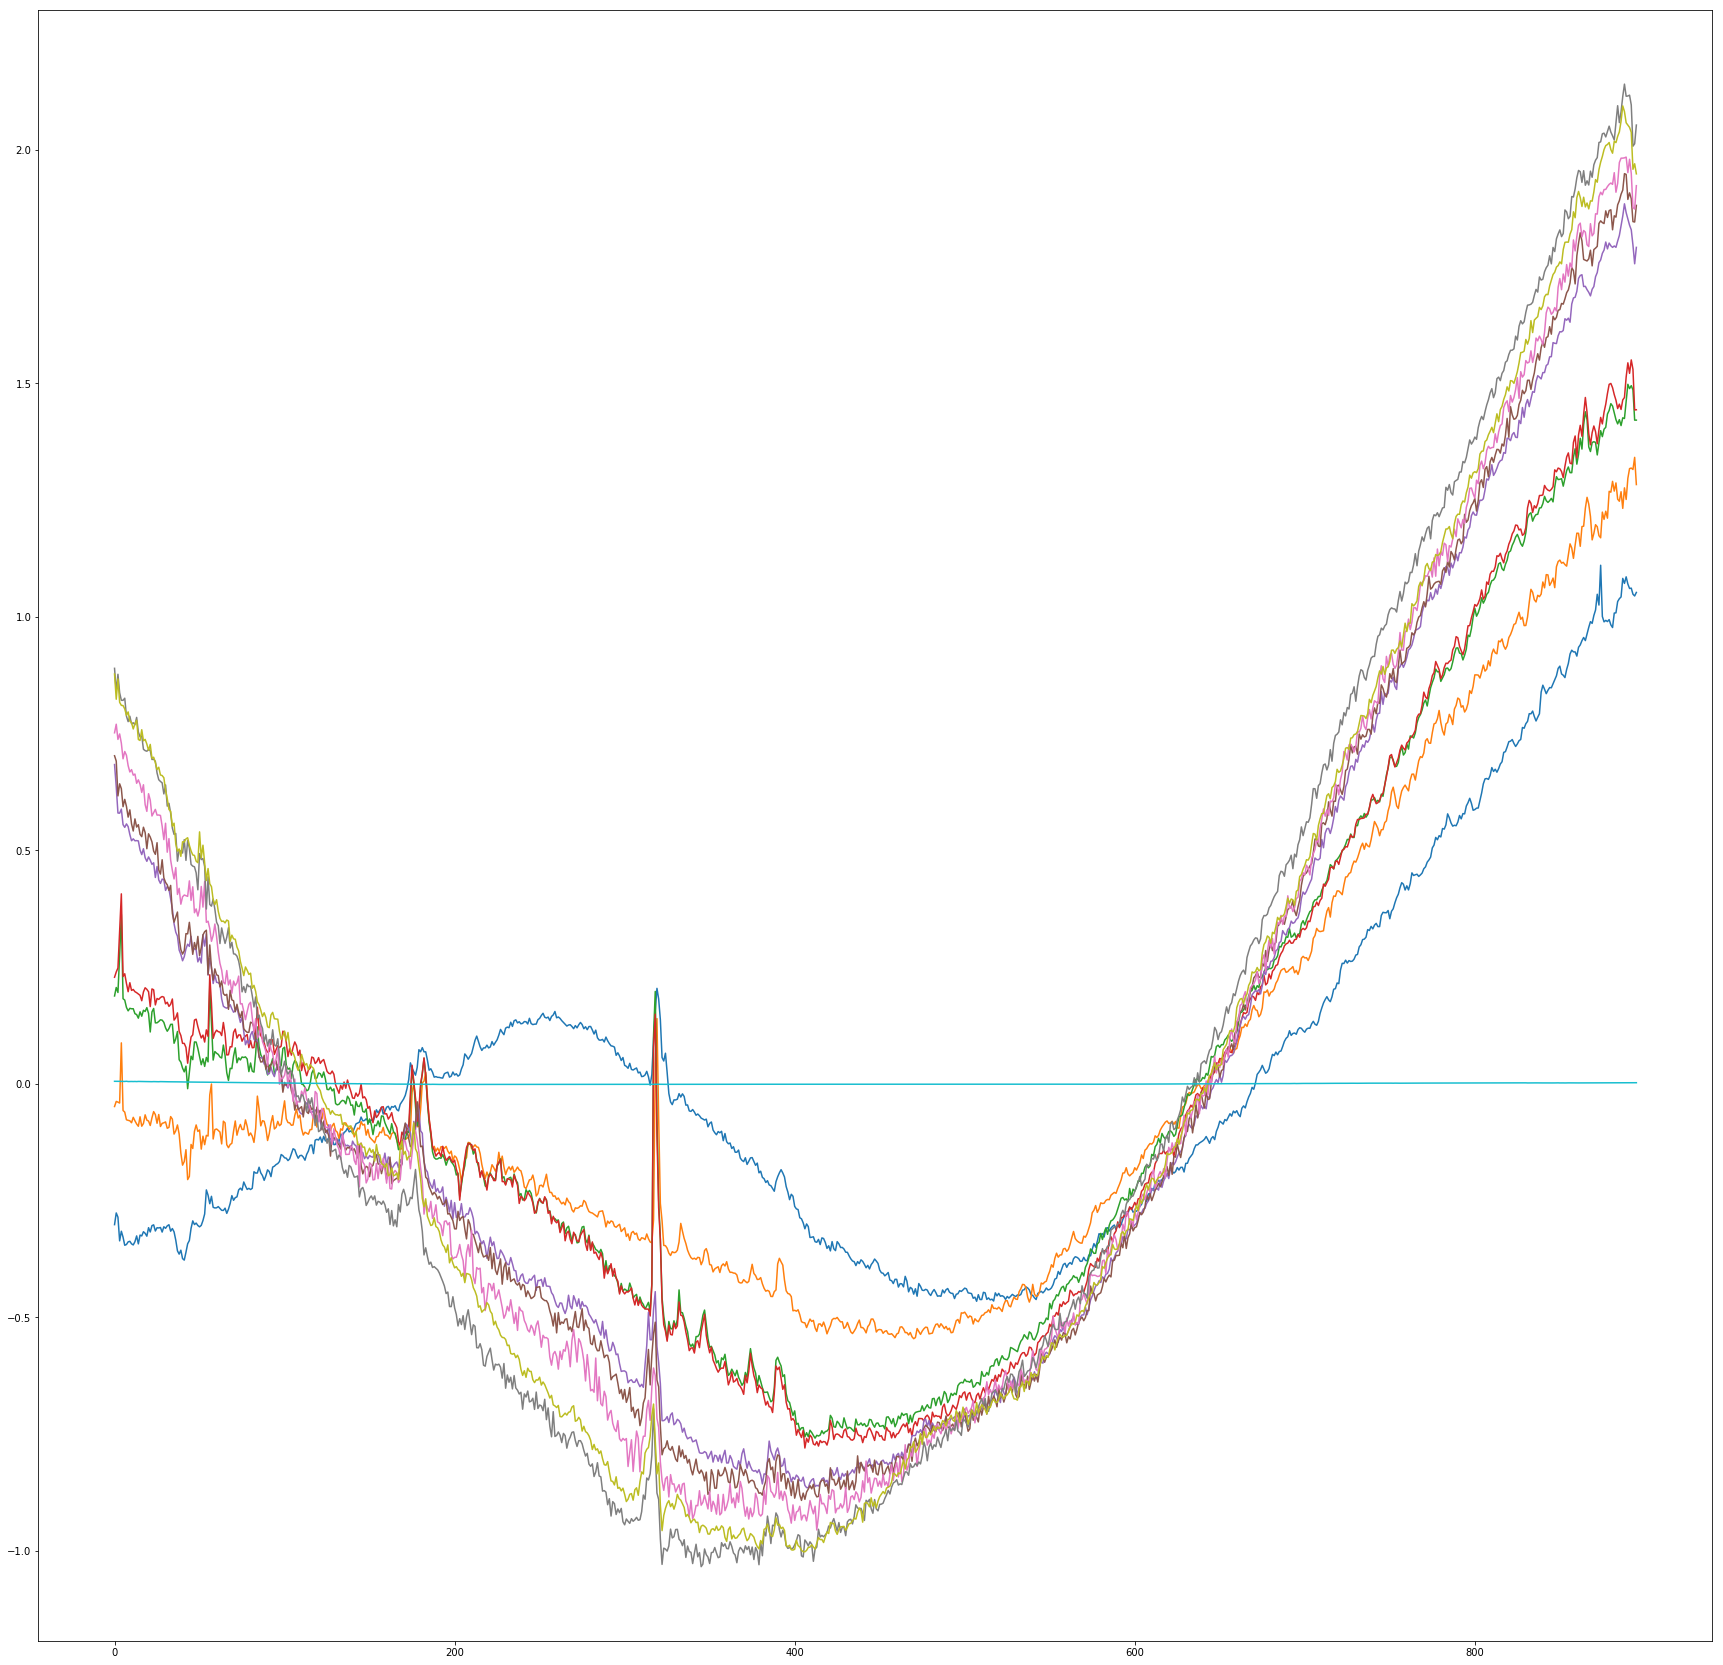

In [249]:
plt.figure(figsize=(30,30))
plt.plot(fits[:,range(0,fits.shape[1],3)]-np.mean(fits[:,range(0,fits.shape[1],3)],axis=0))

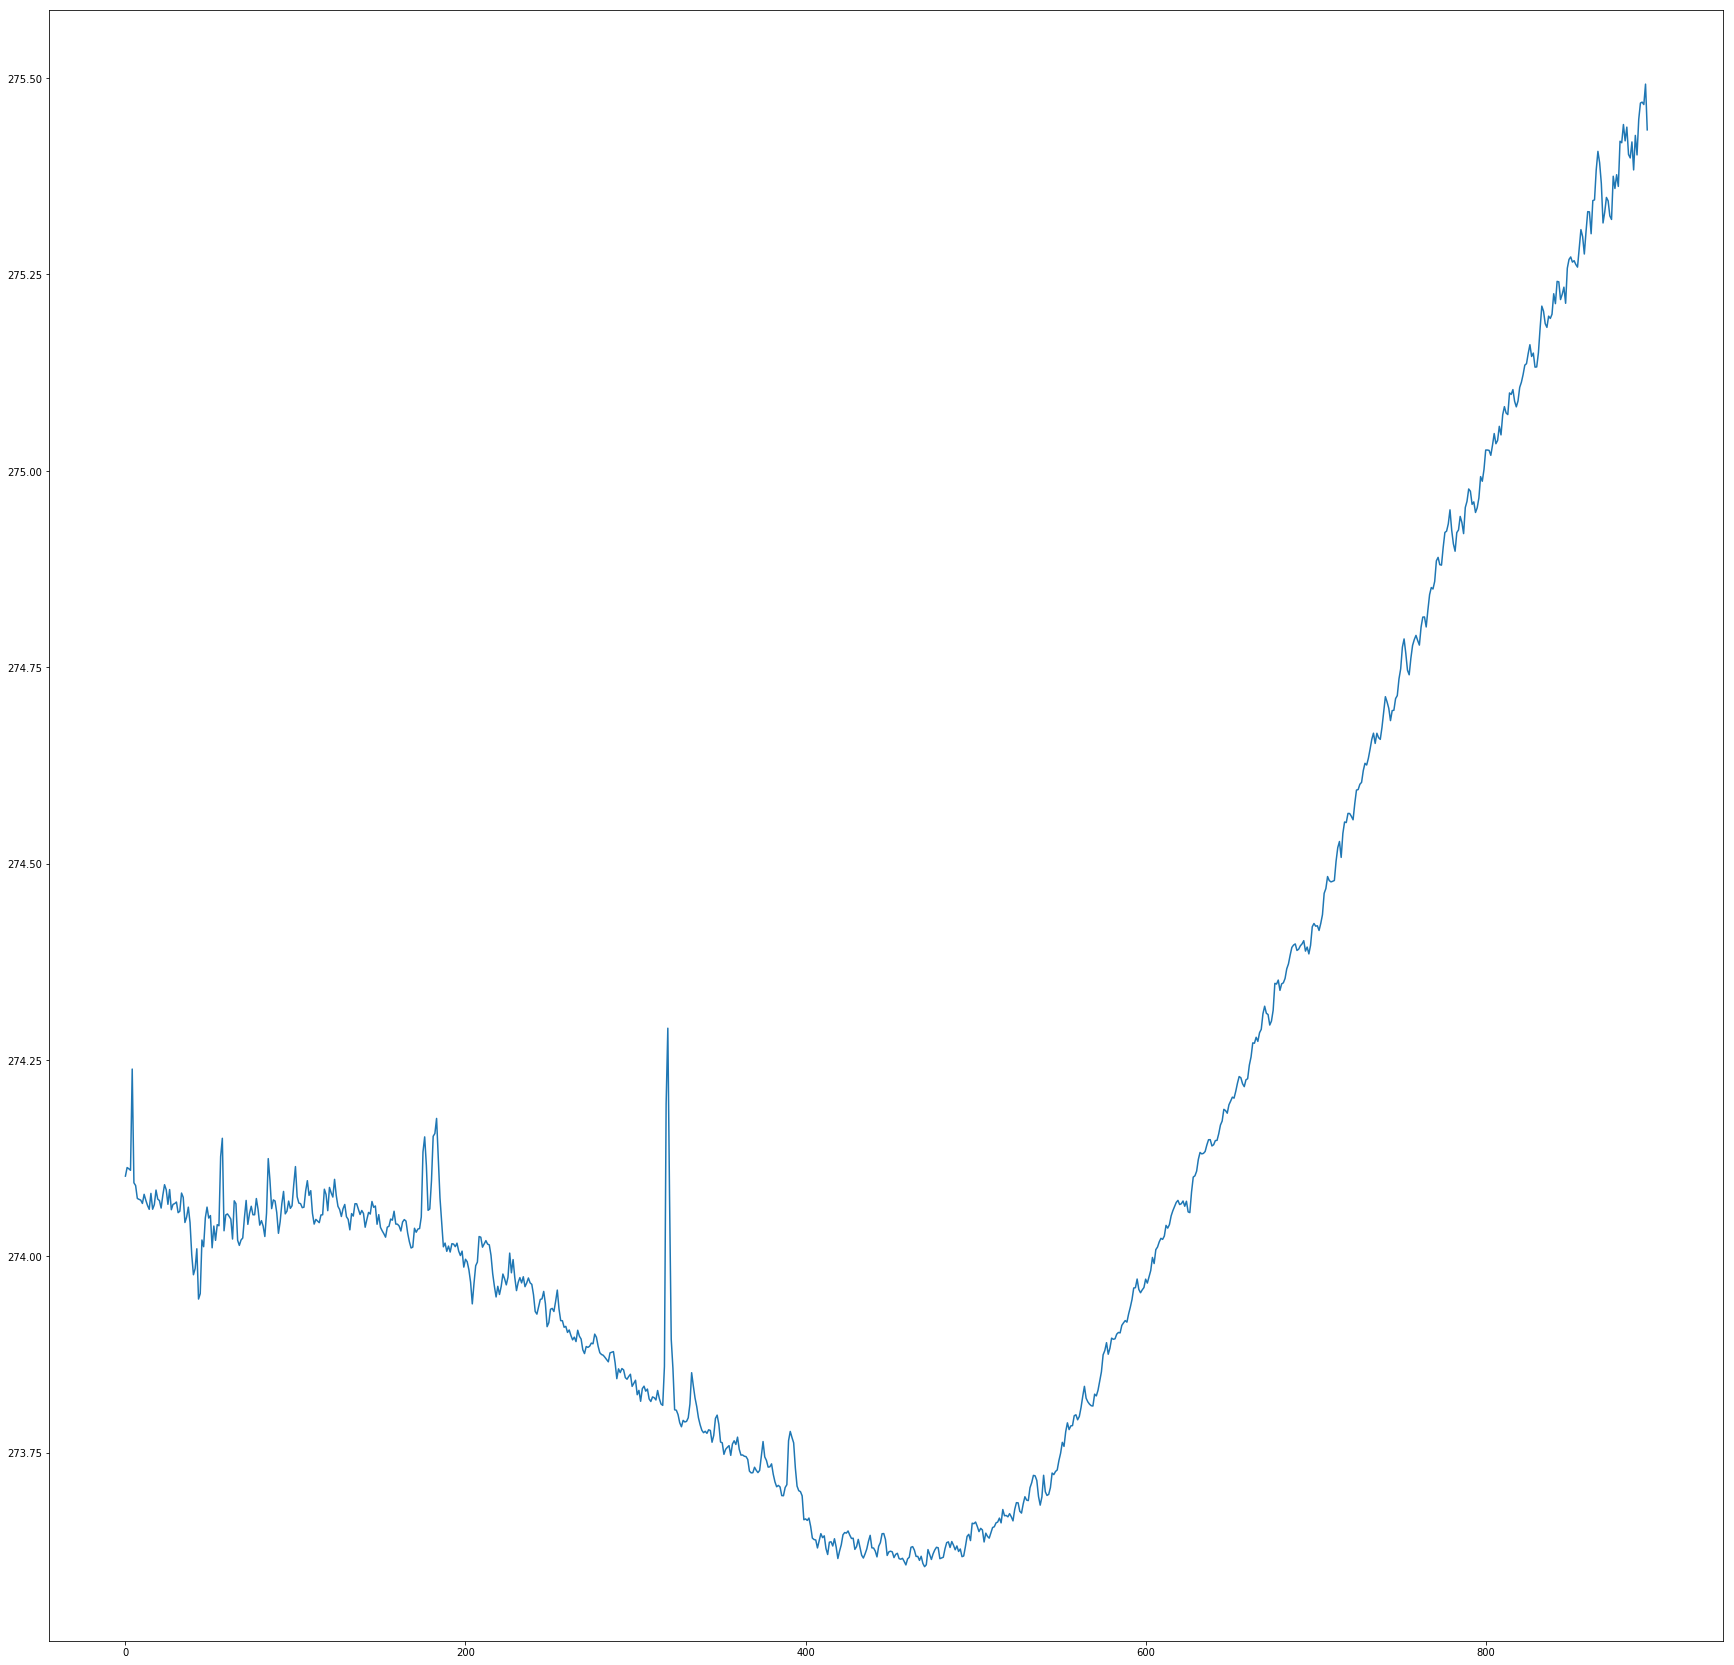

In [241]:
plt.figure(figsize=(30,30))
plt.plot(fits[:,])

In [224]:
fits.shape[0]

896

array([  2.05825586e+01,   2.74151056e+02,   3.45755096e+02,
         3.50706944e+02,   6.29341731e+02,   6.54018590e+02,
         7.04188519e+02,   7.31350677e+02,   7.61527168e+02,
         9.89800692e-03])

array([  2.04237532e+01,   2.74114231e+02,   3.45833154e+02,
         3.50816532e+02,   6.29339694e+02,   6.54021258e+02,
         7.04206518e+02,   7.31398673e+02,   7.61639789e+02,
         1.12682242e-02])